# 지위위계

In [68]:
import pandas as pd
from pathlib import Path
import re

# 현장데이터 폴더 경로 지정
base_path = Path(r"C:\Users\USER\peer\현장데이터")
def extract_class_number(path):
    match = re.search(r'class_(\d+)', path.stem)
    return int(match.group(1)) if match else float('inf')
    
# class로 시작하고 .csv 확장자인 파일 모두 찾기
excel_files = sorted(base_path.rglob("*class*.csv"), key=extract_class_number)

# 데이터프레임을 담을 리스트
dfs = []

for file in excel_files:
    try:
        print(file)
        df = pd.read_csv(file)
        df = df.iloc[:, 1:]
        dfs.append(df)
    except Exception as e:
        print(f"파일 {file.name} 에서 오류 발생: {e}")

C:\Users\USER\peer\현장데이터\class_1.csv
C:\Users\USER\peer\현장데이터\class_2.csv
C:\Users\USER\peer\현장데이터\class_3.csv
C:\Users\USER\peer\현장데이터\class_4.csv
C:\Users\USER\peer\현장데이터\class_5.csv
C:\Users\USER\peer\현장데이터\class_6.csv
C:\Users\USER\peer\현장데이터\class_7.csv
C:\Users\USER\peer\현장데이터\class_8.csv
C:\Users\USER\peer\현장데이터\class_9.csv
C:\Users\USER\peer\현장데이터\class_10.csv
C:\Users\USER\peer\현장데이터\class_11.csv
C:\Users\USER\peer\현장데이터\class_12.csv
C:\Users\USER\peer\현장데이터\class_13.csv
C:\Users\USER\peer\현장데이터\class_14.csv
C:\Users\USER\peer\현장데이터\class_15.csv
C:\Users\USER\peer\현장데이터\class_16.csv
C:\Users\USER\peer\현장데이터\class_17.csv
C:\Users\USER\peer\현장데이터\class_18.csv
C:\Users\USER\peer\현장데이터\class_19.csv
C:\Users\USER\peer\현장데이터\class_20.csv


In [70]:
for i, df in enumerate(dfs):
    print(f"\n📄 클래스 {i+1} 요약 ----------------------------")
    print(f"총 행 수: {df.shape[0]}")
    print(f"총 열 수: {df.shape[1]}")


📄 클래스 1 요약 ----------------------------
총 행 수: 333
총 열 수: 3

📄 클래스 2 요약 ----------------------------
총 행 수: 756
총 열 수: 3

📄 클래스 3 요약 ----------------------------
총 행 수: 612
총 열 수: 3

📄 클래스 4 요약 ----------------------------
총 행 수: 561
총 열 수: 3

📄 클래스 5 요약 ----------------------------
총 행 수: 637
총 열 수: 3

📄 클래스 6 요약 ----------------------------
총 행 수: 384
총 열 수: 3

📄 클래스 7 요약 ----------------------------
총 행 수: 728
총 열 수: 3

📄 클래스 8 요약 ----------------------------
총 행 수: 604
총 열 수: 3

📄 클래스 9 요약 ----------------------------
총 행 수: 431
총 열 수: 3

📄 클래스 10 요약 ----------------------------
총 행 수: 513
총 열 수: 3

📄 클래스 11 요약 ----------------------------
총 행 수: 420
총 열 수: 3

📄 클래스 12 요약 ----------------------------
총 행 수: 355
총 열 수: 3

📄 클래스 13 요약 ----------------------------
총 행 수: 345
총 열 수: 3

📄 클래스 14 요약 ----------------------------
총 행 수: 235
총 열 수: 3

📄 클래스 15 요약 ----------------------------
총 행 수: 332
총 열 수: 3

📄 클래스 16 요약 ----------------------------
총 행 수: 332
총 열 수: 3

📄 클래스 17 요약 ----

In [72]:
total_classes = len(dfs)
print(f"전체 클래스 수: {total_classes}개")

total_rows = sum(df.shape[0] for df in dfs)
print(f"모든 클래스의 총 응답 수(행 수): {total_rows}명")

전체 클래스 수: 20개
모든 클래스의 총 응답 수(행 수): 8946명


In [74]:
avg_rows = total_rows / total_classes
print(f"클래스당 평균 응답자 수: {avg_rows:.2f}명")

클래스당 평균 응답자 수: 447.30명


In [78]:
# 각 반의 고유한 응답자(student_designation) 수
class_sizes = [df['student_designation'].nunique() for df in dfs]

# 반당 평균 학생 수 계산
avg_class_size = sum(class_sizes) / len(class_sizes)

print(f"반당 평균 학생 수 (유니크 기준): {avg_class_size:.2f}명")

반당 평균 학생 수 (유니크 기준): 22.40명


In [241]:
def point_ratio_score(point_df, item, name):
    if not item :
        return 0
    else :
        item='|'.join(item)
        temp_df=point_df[point_df['point_item_no'].str.fullmatch(item)]
        ratio = round(len(temp_df[temp_df['student_nomination']==name])/(len(temp_df)),2)
        print('지명된 횟수 :', len(temp_df[temp_df['student_nomination']==name]), '지명 가능한 수 :', (len(temp_df)))
        freq = len(temp_df[temp_df['student_nomination']==name])
    return ratio, freq

In [243]:
point_ratio_score(dfs[10], ['PN1'], '38박*은')

지명된 횟수 : 2 지명 가능한 수 : 76


(0.03, 2)

In [245]:
# 지위위계 산출 함수
def status_hierarchy(point_df, item) :
    item_pattern = '|'.join(item)
    temp_df = point_df[point_df['point_item_no'].str.fullmatch(item_pattern)]

    # 각 학생에 대해 비율 점수 계산
    ratio_scores = []
    freq_list = []
    student_names = temp_df['student_designation'].unique().tolist()
    for name in student_names:
        #print(name)
        ratio, freq = point_ratio_score(point_df, item, name)
        ratio_scores.append(ratio)
        freq_list.append(freq)

    std_score = pd.Series(ratio_scores).std()
    #print(std_score)

    return std_score, pd.Series(ratio_scores, index=student_names), freq_list

In [249]:
status_score, ratio_by_student, freq_list = status_hierarchy(dfs[19], ['PN1'])

지명된 횟수 : 7 지명 가능한 수 : 59
지명된 횟수 : 12 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 10 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 2 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 3 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 7 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 1 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 11 지명 가능한 수 : 59


In [108]:
print(status_score)
print(ratio_by_student)
print(freq_list)

0.017128407776006983
41강*원     0.03
42권*연     0.04
43김*담     0.08
44김*완     0.04
45김*주     0.03
46문*진     0.04
47박*서     0.04
48박*주     0.08
49배*      0.04
410서*호    0.07
411손*원    0.03
413신*은    0.04
415이*희    0.04
416이*은    0.07
417이*준    0.05
419전*준    0.06
421조*윤    0.06
dtype: float64
[4, 6, 11, 6, 4, 6, 5, 11, 6, 10, 4, 5, 5, 10, 7, 9, 9]


In [22]:
status_scores = []

for i, df in enumerate(dfs):
    try:
        std_score, _ = status_hierarchy(df, ['PN1'])
        status_scores.append({'class_index': i+1, 'status_score': std_score})
    except Exception as e:
        print(f"학급 {i+1} 처리 중 오류 발생: {e}")

51강*욱
지명된 횟수 : 4 지명 가능한 수 : 80
52곽*중
지명된 횟수 : 4 지명 가능한 수 : 80
53김*재
지명된 횟수 : 3 지명 가능한 수 : 80
54김*은
지명된 횟수 : 1 지명 가능한 수 : 80
55김*우
지명된 횟수 : 1 지명 가능한 수 : 80
56김*홍
지명된 횟수 : 3 지명 가능한 수 : 80
57김*윤
지명된 횟수 : 4 지명 가능한 수 : 80
58박*형
지명된 횟수 : 4 지명 가능한 수 : 80
59박*린
지명된 횟수 : 1 지명 가능한 수 : 80
510박*우
지명된 횟수 : 6 지명 가능한 수 : 80
511박*유
지명된 횟수 : 1 지명 가능한 수 : 80
513서*웅
지명된 횟수 : 3 지명 가능한 수 : 80
514오*서
지명된 횟수 : 3 지명 가능한 수 : 80
516이*영
지명된 횟수 : 1 지명 가능한 수 : 80
517이*
지명된 횟수 : 2 지명 가능한 수 : 80
518*훈
지명된 횟수 : 2 지명 가능한 수 : 80
519장*준
지명된 횟수 : 1 지명 가능한 수 : 80
520장*수
지명된 횟수 : 4 지명 가능한 수 : 80
521정***타
지명된 횟수 : 17 지명 가능한 수 : 80
523진*랑
지명된 횟수 : 6 지명 가능한 수 : 80
524최*원
지명된 횟수 : 3 지명 가능한 수 : 80
525최*예
지명된 횟수 : 3 지명 가능한 수 : 80
526홍*경
지명된 횟수 : 1 지명 가능한 수 : 80
0.04133637202481506
김무성
지명된 횟수 : 6 지명 가능한 수 : 148
김성윤
지명된 횟수 : 4 지명 가능한 수 : 148
서도현
지명된 횟수 : 3 지명 가능한 수 : 148
손정우
지명된 횟수 : 3 지명 가능한 수 : 148
이유준
지명된 횟수 : 5 지명 가능한 수 : 148
이한
지명된 횟수 : 5 지명 가능한 수 : 148
정민준
지명된 횟수 : 6 지명 가능한 수 : 148
정준휘
지명된 횟수 : 5 지명 가능한 수 : 148
한정우
지명된 횟수 : 

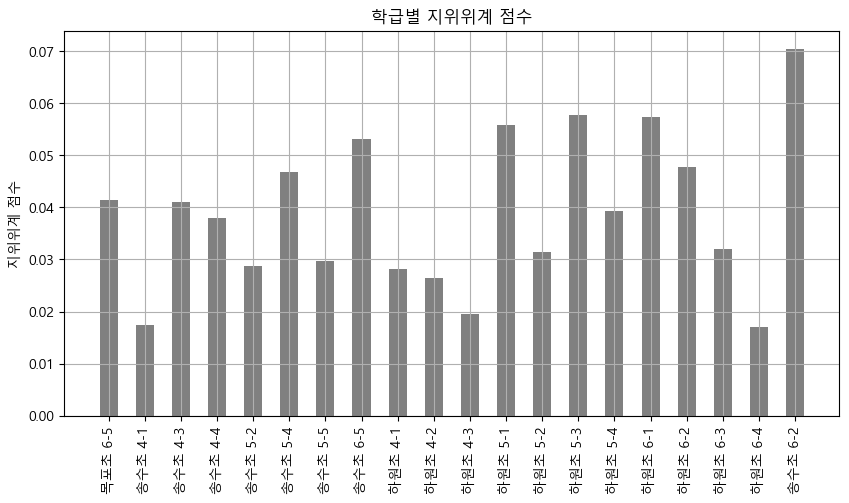

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트

class_index = [
    "목포초 6-5",
    "송수초 4-1",
    "송수초 4-3",
    "송수초 4-4",
    "송수초 5-2",
    "송수초 5-4",
    "송수초 5-5",
    "송수초 6-5",
    "하원초 4-1",
    "하원초 4-2",
    "하원초 4-3",
    "하원초 5-1",
    "하원초 5-2",
    "하원초 5-3",
    "하원초 5-4",
    "하원초 6-1",
    "하원초 6-2",
    "하원초 6-3",
    "하원초 6-4",
    "송수초 6-2"]


# 데이터프레임으로 변환
score_df = pd.DataFrame(status_scores)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(class_index, score_df['status_score'], width=0.5, color='grey')
#plt.plot(class_index, score_df['status_score'], marker='o')
plt.xlabel("")
plt.ylabel("지위위계 점수")
plt.title("학급별 지위위계 점수")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [24]:
score_df['status_score']

0     0.041336
1     0.017416
2     0.041048
3     0.037947
4     0.028725
5     0.046719
6     0.029655
7     0.053200
8     0.028166
9     0.026440
10    0.019601
11    0.055751
12    0.031385
13    0.057784
14    0.039364
15    0.057374
16    0.047749
17    0.031997
18    0.017128
19    0.070366
Name: status_score, dtype: float64

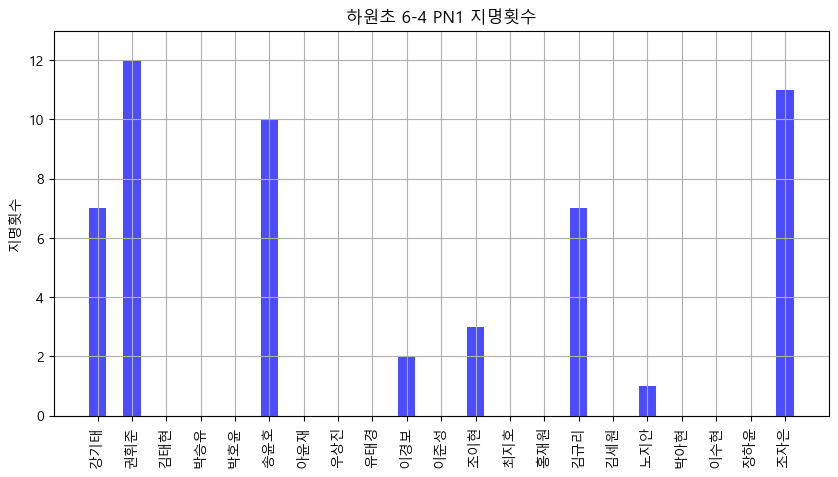

In [56]:
# 송수초 6-2 자세히 확인
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트

names = [
    "강기태", "권휘준", "김태현", "박승유", "박호윤", "송윤호", "아윤재", "우상진", "유태경", "이경보",
    "이준성", "조이현", "최지호", "홍재원", "김규리", "김세원", "노지안", "박아현", "이수현", "장하윤", "조자은"
]
counts = [7, 12, 0, 0, 0, 10, 0, 0, 0, 2, 0, 3, 0, 0, 7, 0, 1, 0, 0, 0, 11]

# 데이터프레임으로 변환
score_df = pd.DataFrame(status_scores)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(names, counts, width=0.5, color='blue', alpha=0.7)
plt.xlabel("")
plt.ylabel("지명횟수")
plt.ylim(0, 13)
plt.title("하원초 6-4 PN1 지명횟수")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

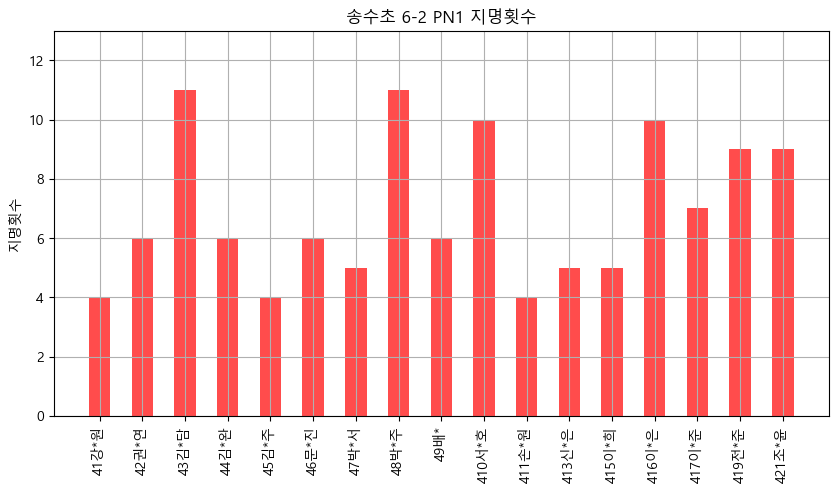

In [58]:
# 하원초 6-4 자세히 확인
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트

names = [
    "41강*원", "42권*연", "43김*담", "44김*완", "45김*주", "46문*진",
    "47박*서", "48박*주", "49배*", "410서*호", "411손*원", "413신*은",
    "415이*희", "416이*은", "417이*준", "419전*준", "421조*윤"
]
counts = [4, 6, 11, 6, 4, 6, 5, 11, 6, 10, 4, 5, 5, 10, 7, 9, 9]

# 데이터프레임으로 변환
score_df = pd.DataFrame(status_scores)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(names, counts, width=0.5, color='red', alpha=0.7)
plt.xlabel("")
plt.ylabel("지명횟수")
plt.ylim(0, 13)
plt.title("송수초 6-2 PN1 지명횟수")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [31]:
def aggression_norm_score(point_df):
    # 문항 묶음
    aggression_items = ['PN4', 'PN5', 'PN6', 'PN7']
    friend_item = ['PN14']

    student_names = point_df['student_designation'].unique()
    combined_scores = []

    for name in student_names:
        # 공격성 문항 전체 비율점수 한 번에 계산
        aggr_ratio = point_ratio_score(point_df, aggression_items, name)
        friend_ratio = point_ratio_score(point_df, friend_item, name)

        score = aggr_ratio * friend_ratio
        combined_scores.append(score)

    class_mean = round(sum(combined_scores) / len(combined_scores), 3)
    return class_mean

In [33]:
aggression_score = []

for i, df in enumerate(dfs):
    try:
        class_mean = aggression_norm_score(df)
        aggression_score.append(class_mean)
    except Exception as e:
        print(f"학급 {i+1} 처리 중 오류 발생: {e}")

지명된 횟수 : 12 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 2 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 3 지명 가능한 수 : 40
지명된 횟수 : 1 지명 가능한 수 : 69
지명된 횟수 : 4 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 1 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 6 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 2 지명 가능한 수 : 40
지명된 횟수 : 4 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 1 지명 가능한 수 : 69
지명된 횟수 : 3 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 1 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 2 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69
지명된 횟수 : 1 지명 가능한 수 : 40
지명된 횟수 : 6 지명 가능한 수 : 69
지명된 횟수 : 0 지명 가능한 수 : 40
지명된 횟수 : 3 지명 가능한 수 : 69

In [34]:
aggression_score

[0.002,
 0.001,
 0.001,
 0.001,
 0.002,
 0.001,
 0.002,
 0.002,
 0.001,
 0.001,
 0.001,
 0.002,
 0.002,
 0.001,
 0.002,
 0.002,
 0.002,
 0.002,
 0.002,
 0.001]

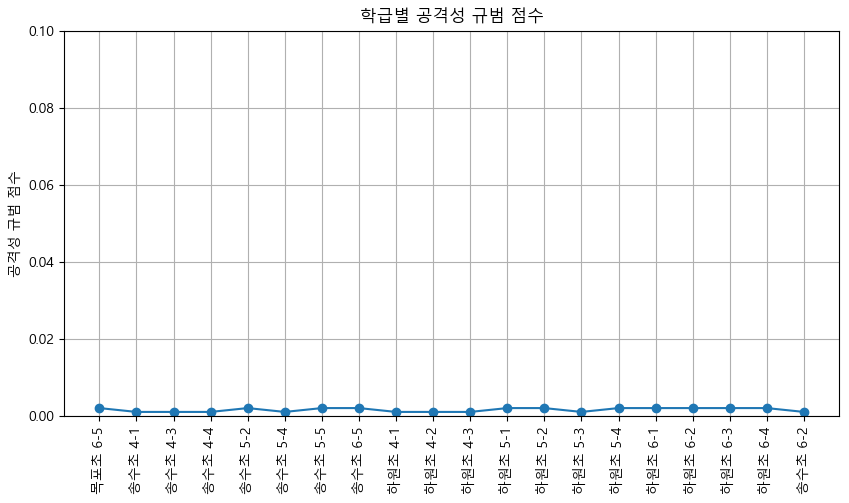

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트

class_index = [
    "목포초 6-5",
    "송수초 4-1",
    "송수초 4-3",
    "송수초 4-4",
    "송수초 5-2",
    "송수초 5-4",
    "송수초 5-5",
    "송수초 6-5",
    "하원초 4-1",
    "하원초 4-2",
    "하원초 4-3",
    "하원초 5-1",
    "하원초 5-2",
    "하원초 5-3",
    "하원초 5-4",
    "하원초 6-1",
    "하원초 6-2",
    "하원초 6-3",
    "하원초 6-4",
    "송수초 6-2"]


# 데이터프레임으로 변환
score_df = pd.DataFrame(status_scores)

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(class_index, aggression_score, marker='o')
plt.xlabel("")
plt.ylabel("공격성 규범 점수")
plt.ylim(0,0.1)
plt.title("학급별 공격성 규범 점수")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

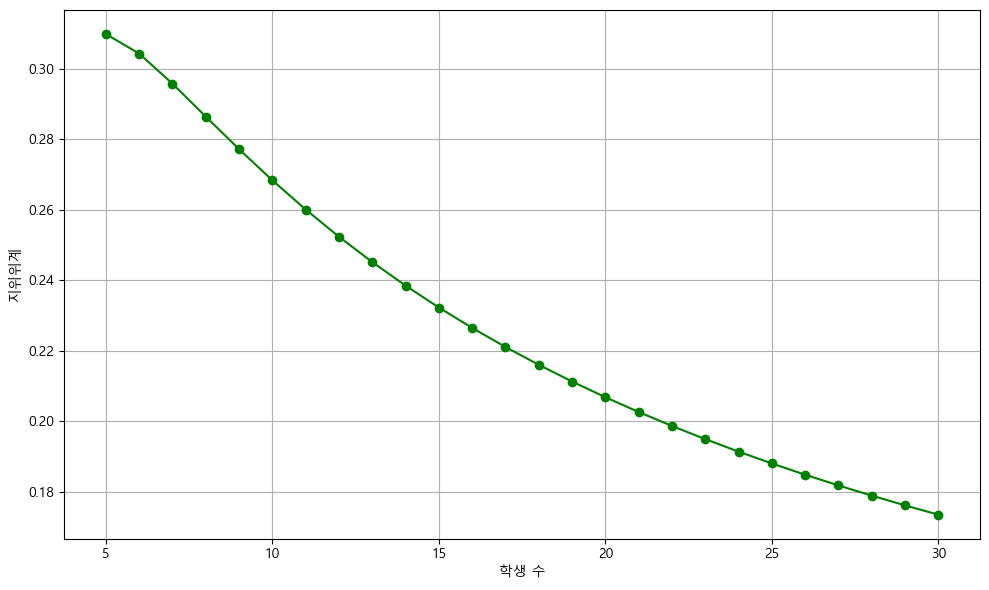

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# 학생 수 범위: 5명부터 30명까지
student_counts = list(range(5, 31))
std_ratios = []

for N in student_counts:
    # 극단적 위계: A는 N-1명에게 지명받음, A는 B만 지명
    counts = [N - 1, 1] + [0] * (N - 2)
    
    total_nominations = sum(counts)
    ratios = [x / total_nominations for x in counts]
    std_ratio = np.std(ratios)
    std_ratios.append(std_ratio)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(student_counts, std_ratios, color='green', marker='o')
plt.title("")
plt.xlabel("학생 수")
plt.ylabel("지위위계")
plt.grid(True)
plt.tight_layout()
plt.show()

In [126]:
# 편차가 큰 학교
status_score, ratio_by_student, freq_list = status_hierarchy(dfs[19], ['PN1'])

std_dev = np.std(freq_list)
print(std_dev)

강기태
지명된 횟수 : 7 지명 가능한 수 : 59
권휘준
지명된 횟수 : 12 지명 가능한 수 : 59
김태현
지명된 횟수 : 0 지명 가능한 수 : 59
박승유
지명된 횟수 : 0 지명 가능한 수 : 59
박호윤
지명된 횟수 : 0 지명 가능한 수 : 59
송윤호
지명된 횟수 : 10 지명 가능한 수 : 59
아윤재
지명된 횟수 : 0 지명 가능한 수 : 59
우상진
지명된 횟수 : 0 지명 가능한 수 : 59
유태경
지명된 횟수 : 0 지명 가능한 수 : 59
이경보
지명된 횟수 : 2 지명 가능한 수 : 59
이준성
지명된 횟수 : 0 지명 가능한 수 : 59
조이현
지명된 횟수 : 3 지명 가능한 수 : 59
최지호
지명된 횟수 : 0 지명 가능한 수 : 59
홍재원
지명된 횟수 : 0 지명 가능한 수 : 59
김규리
지명된 횟수 : 7 지명 가능한 수 : 59
김세원
지명된 횟수 : 0 지명 가능한 수 : 59
노지안
지명된 횟수 : 1 지명 가능한 수 : 59
박아현
지명된 횟수 : 0 지명 가능한 수 : 59
이수현
지명된 횟수 : 0 지명 가능한 수 : 59
장하윤
지명된 횟수 : 0 지명 가능한 수 : 59
조자은
지명된 횟수 : 11 지명 가능한 수 : 59
0.07036638808002418
4.042854338436404


In [239]:
# 편차가 작은 학교
status_score, ratio_by_student, freq_list = status_hierarchy(dfs[19], ['PN1'])

std_dev = np.std(freq_list)
print(std_dev)

지명된 횟수 : 7 지명 가능한 수 : 59
지명된 횟수 : 12 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 10 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 2 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 3 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 7 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 1 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 0 지명 가능한 수 : 59
지명된 횟수 : 11 지명 가능한 수 : 59
4.042854338436404


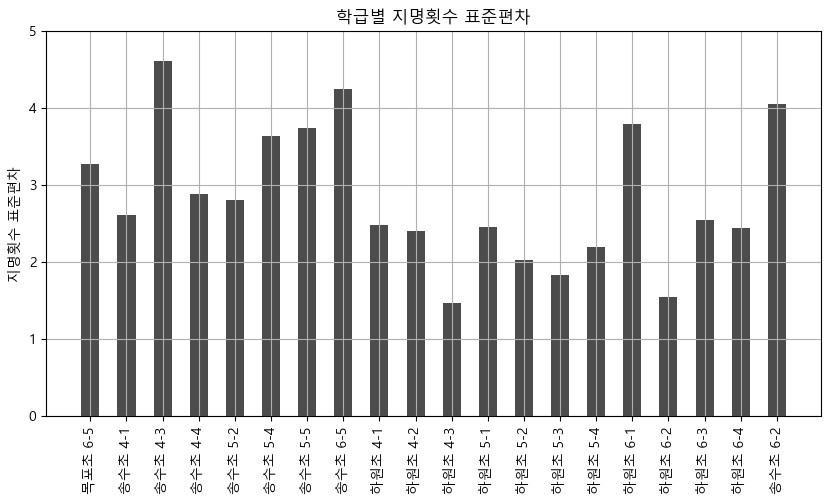

In [172]:
import numpy as np
import matplotlib.pyplot as plt

point_std = []
for i in range(0,20):
    status_score, ratio_by_student, freq_list = status_hierarchy(dfs[i], ['PN1'])
    std_dev = np.std(freq_list)
    #print(f'지명횟수 표준편차 :{std_dev}')
    point_std.append(std_dev)


# 시각화
plt.figure(figsize=(10, 5))
plt.bar(class_index, point_std, width=0.5, color='black', alpha=0.7)
plt.xlabel("")
plt.ylabel("지명횟수 표준편차")
plt.ylim(0, 5)
plt.title("학급별 지명횟수 표준편차")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

0.019601288894248496
31강*아     0.05
32김*경     0.01
33김*서     0.03
34김*윤     0.01
35김*준     0.05
36김*윤     0.03
37민*윤     0.08
39박*윤     0.05
311선*빈    0.05
312오*우    0.03
313유*혁    0.03
315이*윤    0.03
317이*찬    0.04
318이*용    0.03
319이*수    0.03
320이*호    0.08
322장*진    0.04
323채*성    0.04
324최*준    0.01
dtype: float64 19
[4, 1, 2, 1, 4, 2, 6, 4, 4, 2, 2, 2, 3, 2, 2, 6, 3, 3, 1] 19


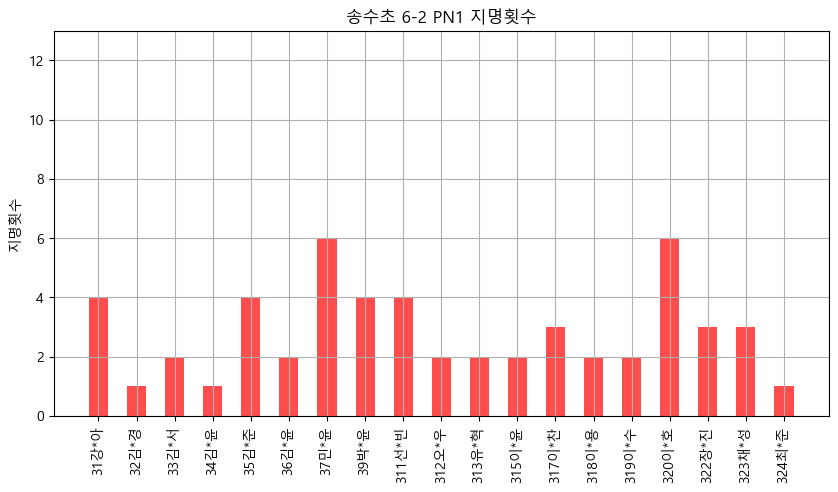

In [220]:
# 하원초 4-3 자세히 확인
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트

status_score, ratio_by_student, freq_list = status_hierarchy(dfs[10], ['PN1'])
print(status_score)
print(ratio_by_student, len(ratio_by_student))
print(freq_list, len(freq_list))

names = ratio_by_student.index
counts = freq_list

# 데이터프레임으로 변환
score_df = pd.DataFrame(status_scores)

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(names, counts, width=0.5, color='red', alpha=0.7)
plt.xlabel("")
plt.ylabel("지명횟수")
plt.ylim(0, 13)
plt.title("송수초 6-2 PN1 지명횟수")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [214]:
dfs[10][dfs[10]['point_item_no']=='PN1']['student_nomination'].unique()

array(['37민*윤', '322장*진', '326한*서', '39박*윤', '314은*민', '321장*은', '320이*호',
       '323채*성', '31강*아', '32김*경', '33김*서', '34김*윤', '35김*준', '36김*윤',
       '38박*은', '310서*무', '311선*빈', '312오*우', '313유*혁', '315이*윤',
       '316이*홍', '317이*찬', '318이*용', '319이*수', '324최*준', '325최*종'],
      dtype=object)

In [216]:
len(dfs[10][dfs[10]['point_item_no']=='PN1']['student_nomination'].unique())

26